In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/messi2.jpg')
img

array([[[204, 193, 189],
        [206, 195, 191],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [212, 203, 199]],

       [[206, 195, 191],
        [206, 195, 191],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [213, 204, 200]],

       [[208, 197, 193],
        [207, 196, 192],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [213, 204, 200]],

       ...,

       [[ 64,   2, 145],
        [ 65,   6, 141],
        [ 60,   3, 136],
        ...,
        [ 80,  11, 162],
        [ 73,   4, 155],
        [ 70,   1, 152]],

       [[ 67,   0, 146],
        [ 55,   2, 135],
        [ 59,   1, 136],
        ...,
        [ 78,  13, 159],
        [ 73,   8, 154],
        [ 71,   4, 149]],

       [[ 70,   2, 149],
        [ 55,   2, 135],
        [ 59,   1, 136],
        ...,
        [ 79,  14, 160],
        [ 76,   8, 155],
        [ 72,   5, 150]]

In [4]:
img.shape

(498, 332, 3)

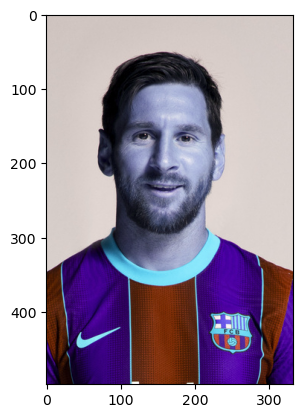

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

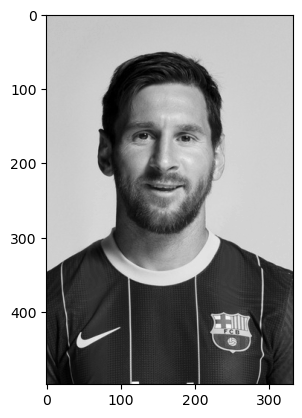

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

In [9]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 80, 102, 162, 162]])

In [10]:
(x,y,w,h) = faces[0]
(x,y,w,h)

(80, 102, 162, 162)

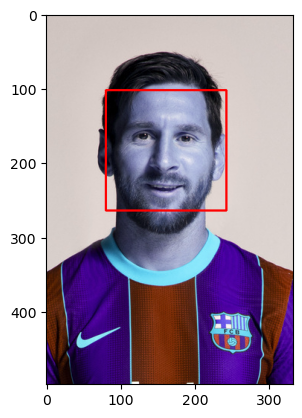

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

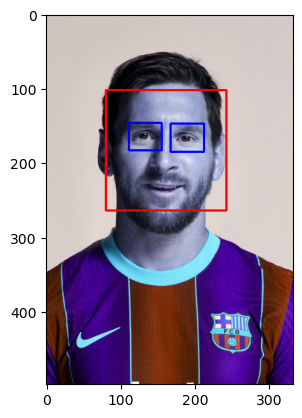

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ey , ey+eh),(0,0,255),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

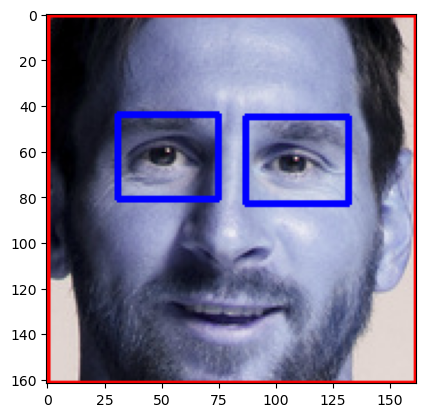

In [13]:
plt.imshow(roi_color,cmap = 'gray')    #roi means region of interest

In [14]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

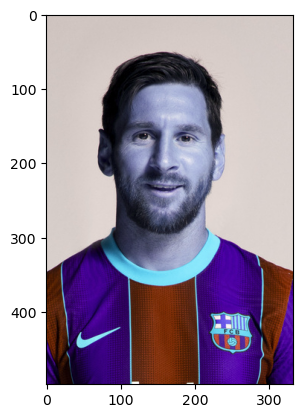

In [15]:
original_image = cv2.imread('./test_images/messi2.JPG')
plt.imshow(original_image)

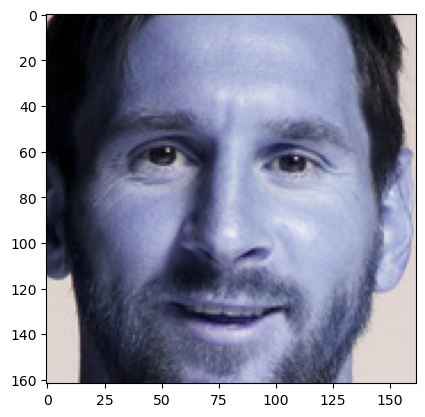

In [16]:
cropped_image = get_cropped_image('./test_images/messi2.jpg')
plt.imshow(cropped_image)

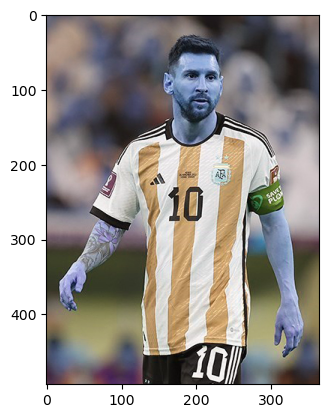

In [17]:
obstructed_image = cv2.imread("./test_images/Messi1.JPG")
plt.imshow(obstructed_image)

In [18]:
cropped_image_no_eyes = get_cropped_image('./test_images/messi2.jpg')
cropped_image_no_eyes

array([[[209, 192, 189],
        [206, 191, 189],
        [218, 194, 196],
        ...,
        [216, 205, 201],
        [221, 210, 206],
        [220, 209, 205]],

       [[214, 194, 193],
        [215, 202, 200],
        [166, 144, 146],
        ...,
        [211, 200, 196],
        [219, 208, 204],
        [219, 208, 204]],

       [[218, 193, 197],
        [176, 145, 152],
        [ 62,  39,  47],
        ...,
        [218, 209, 200],
        [219, 208, 204],
        [219, 208, 204]],

       ...,

       [[225, 214, 210],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [226, 215, 211],
        [226, 215, 211],
        [226, 215, 211]],

       [[226, 215, 211],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [227, 216, 212],
        [225, 214, 210],
        [225, 214, 210]],

       [[226, 215, 211],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [226, 215, 211],
        [225, 214, 210],
        [223, 214, 210]]

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [23]:
path_to_cr_data

'./dataset/cropped/'

In [24]:
cropped_img_dir = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count)+ ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [25]:
#data cleaning performed manually by deleting images



In [26]:
import pywt
import numpy as np

def w2d(img,mode='haar',level =1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    
    return imArray_H

In [27]:
cropped_image

array([[[209, 192, 189],
        [206, 191, 189],
        [218, 194, 196],
        ...,
        [216, 205, 201],
        [221, 210, 206],
        [220, 209, 205]],

       [[214, 194, 193],
        [215, 202, 200],
        [166, 144, 146],
        ...,
        [211, 200, 196],
        [219, 208, 204],
        [219, 208, 204]],

       [[218, 193, 197],
        [176, 145, 152],
        [ 62,  39,  47],
        ...,
        [218, 209, 200],
        [219, 208, 204],
        [219, 208, 204]],

       ...,

       [[225, 214, 210],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [226, 215, 211],
        [226, 215, 211],
        [226, 215, 211]],

       [[226, 215, 211],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [227, 216, 212],
        [225, 214, 210],
        [225, 214, 210]],

       [[226, 215, 211],
        [225, 214, 210],
        [224, 213, 209],
        ...,
        [226, 215, 211],
        [225, 214, 210],
        [223, 214, 210]]

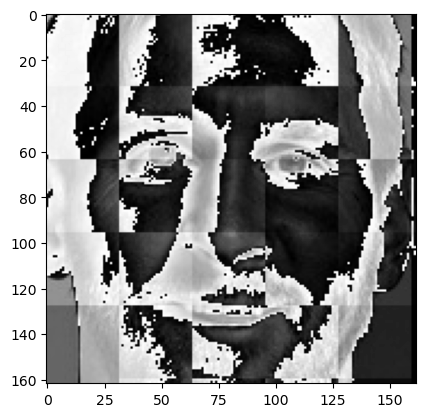

In [28]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [29]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [31]:
x = []
y = []

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [32]:
len(x)

165

In [33]:
len(x[0])

4096

In [34]:
32*32*3

3072

In [35]:
32*32 + 3072

4096

In [36]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(165, 4096)

In [37]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',  C =10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.9285714285714286

In [40]:
pipe.predict(x_test)

array([2, 2, 4, 4, 3, 2, 1, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 5, 2,
       4, 5, 5, 1, 1, 2, 4, 3, 1, 2, 3, 3, 1, 5, 3, 1, 3, 5, 1, 2])

In [41]:
 print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00         7
           4       0.75      0.75      0.75         4
           5       0.87      1.00      0.93        13

    accuracy                           0.93        42
   macro avg       0.92      0.91      0.91        42
weighted avg       0.93      0.93      0.93        42



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    print((algo,mp))
    print(mp['model'])
    print("\n\n")

('svm', {'model': SVC(gamma='auto', probability=True), 'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}})
SVC(gamma='auto', probability=True)



('random_forest', {'model': RandomForestClassifier(), 'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}})
RandomForestClassifier()



('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'logisticregression__C': [1, 5, 10]}})
LogisticRegression(solver='liblinear')





In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [47]:
df

,model,best_score,best_params
0,svm,0.830333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.707000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.846000,{'logisticregression__C': 1}


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['random_forest'].score(x_test,y_test)

0.8095238095238095

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 7,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  1,  3,  0],
       [ 0,  0,  0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

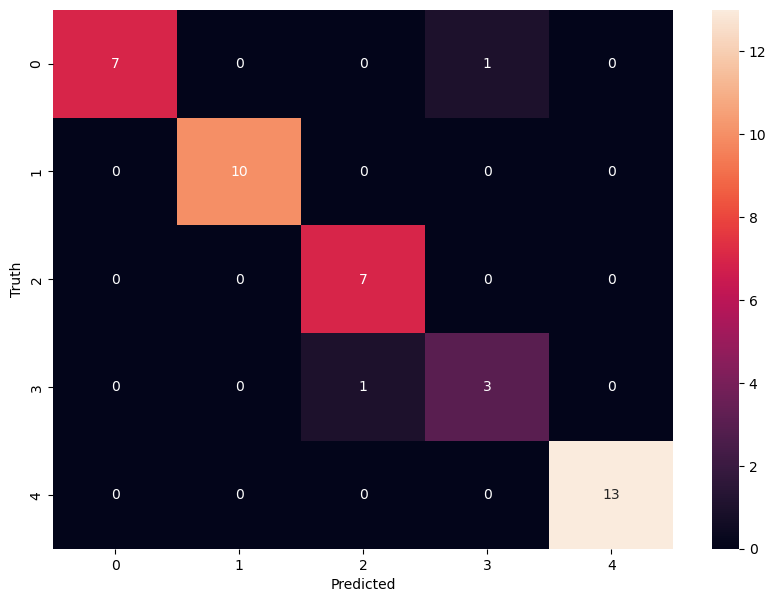

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
import pickle
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)